# **Description of the problem - machine learning libraries and packages experimental setup**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
import time

from zipfile import ZipFile


In [3]:
from sklearn.model_selection import RandomizedSearchCV


In [4]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d camnugent/california-housing-prices

  0% 0.00/400k [00:00<?, ?B/s]
100% 400k/400k [00:00<00:00, 44.9MB/s]


In [6]:
# extracting the compessed Dataset
data = '/content/california-housing-prices.zip'

with ZipFile(data,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [7]:
!ls

california-housing-prices.zip  housing.csv  kaggle.json  sample_data


#**Choice of dataset Data Mining**


In [8]:
# Load the dataset
data_path = '/content/housing.csv'
housing_data = pd.read_csv(data_path)

# Display the first few rows to confirm it's loaded correctly
print(housing_data.head())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [9]:
print(housing_data.isnull().sum())


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [10]:
# drop the missing data
housing_data = housing_data.dropna()

# the shape after dropping the missing data
housing_data.shape

(20433, 10)

In [11]:
# Exporing the categorical data
housing_data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [12]:
# Converting categorical values to numeric values using one-hot encoding
housing_data = pd.get_dummies(housing_data, columns= ['ocean_proximity'])

In [13]:
# Showing the data after Converting categorical values to numeric values
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [14]:
# Original data frame had 10 columns, we now have 14 columns
housing_data.shape

(20433, 14)

In [15]:
# Displaying statistical information about the dataset
print(housing_data.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20433.000000  20433.000000        20433.000000  20433.000000   
mean    -119.570689     35.633221           28.633094   2636.504233   
std        2.003578      2.136348           12.591805   2185.269567   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1450.000000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.720000           37.000000   3143.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20433.000000  20433.000000   20433.000000   
mean       537.870553   1424.946949    499.433465       3.871162   
std        421.385070   1133.208490    382.299226       1.899291   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

In [16]:
# Information about data types and non-null counts
print(housing_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20433 non-null  float64
 1   latitude                    20433 non-null  float64
 2   housing_median_age          20433 non-null  float64
 3   total_rooms                 20433 non-null  float64
 4   total_bedrooms              20433 non-null  float64
 5   population                  20433 non-null  float64
 6   households                  20433 non-null  float64
 7   median_income               20433 non-null  float64
 8   median_house_value          20433 non-null  float64
 9   ocean_proximity_<1H OCEAN   20433 non-null  uint8  
 10  ocean_proximity_INLAND      20433 non-null  uint8  
 11  ocean_proximity_ISLAND      20433 non-null  uint8  
 12  ocean_proximity_NEAR BAY    20433 non-null  uint8  
 13  ocean_proximity_NEAR OCEAN  204

# **Correlation Analysis:**
To check how each feature correlates with the target variable

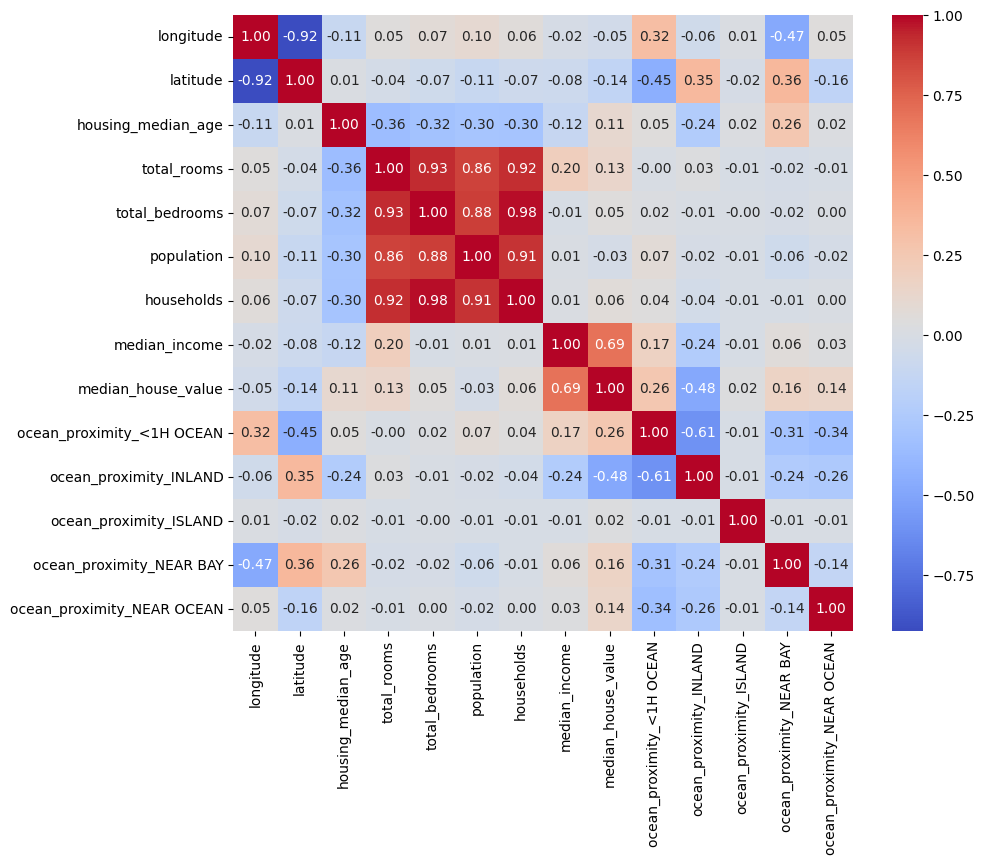

In [17]:
# Calculate the correlation matrix
corr_matrix = housing_data.corr()

# Use seaborn to create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.show()

# **Splitting the Data into Training and Testing Sets**


In [18]:
# 'median_house_value' is the target variable
X = housing_data.drop('median_house_value', axis=1) # Features
y = housing_data['median_house_value']              # Target


In [19]:
# Splitting the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Data Normalization**


In [20]:
# Normalize features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# **Choice of machine learning techniques (any 3 techniques)**

# **Optimization/Parametrization**


# **Models Training**

# **1- Linear Regression**

In [21]:
# Train the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

LinearRegression()

# **2-Support Vector Regression (SVR)**


In [22]:

# SVR hyperparameter tuning
parameters_svr = {'C': [1.3, 1.0], 'gamma': ['scale', 'auto'], 'epsilon': [0.1, 0.5]}
svr_regressor = RandomizedSearchCV(SVR(kernel='rbf'), parameters_svr, n_iter=8, cv=5, scoring='neg_mean_squared_error', random_state=42)
svr_regressor.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=8,
                   param_distributions={'C': [1.3, 1.0], 'epsilon': [0.1, 0.5],
                                        'gamma': ['scale', 'auto']},
                   random_state=42, scoring='neg_mean_squared_error')

In [23]:
# After fitting RandomizedSearchCV for SVR
print("Best parameters for SVR:", svr_regressor.best_params_)

Best parameters for SVR: {'gamma': 'scale', 'epsilon': 0.1, 'C': 1.3}


# **3- K-Nearest Neighbors (KNN)**


In [24]:
# KNN
parameters_knn = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
knn_regressor = GridSearchCV(KNeighborsRegressor(), parameters_knn, cv=5, scoring='neg_mean_squared_error')
knn_regressor.fit(X_train, Y_train)


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [25]:
# After fitting RandomizedSearchCV for SVR
print("Best parameters for SVR:", svr_regressor.best_params_)


Best parameters for SVR: {'gamma': 'scale', 'epsilon': 0.1, 'C': 1.3}


# **Evaluate the performance of the machine learning methods metrics**


# **Evaluate Model**

In [26]:
# Predictions
lin_predictions = lin_reg.predict(X_test)
svr_predictions = svr_regressor.best_estimator_.predict(X_test)
knn_predictions = knn_regressor.best_estimator_.predict(X_test)

# Calculate the metrics for each model
lin_mse = mean_squared_error(Y_test, lin_predictions)
lin_mae = mean_absolute_error(Y_test, lin_predictions)
lin_r2 = r2_score(Y_test, lin_predictions)

svr_mse = mean_squared_error(Y_test, svr_predictions)
svr_mae = mean_absolute_error(Y_test, svr_predictions)
svr_r2 = r2_score(Y_test, svr_predictions)

knn_mse = mean_squared_error(Y_test, knn_predictions)
knn_mae = mean_absolute_error(Y_test, knn_predictions)
knn_r2 = r2_score(Y_test, knn_predictions)

# Create a dictionary with the model names and their corresponding metrics
model_metrics = {
    'Model': ['Linear Regression', 'Support Vector Regression', 'K-Nearest Neighbors'],
    'MSE': [lin_mse, svr_mse, knn_mse],
    'MAE': [lin_mae, svr_mae, knn_mae],
    'R2': [lin_r2, svr_r2, knn_r2]
}

# Convert the dictionary to a DataFrame
comparison_df = pd.DataFrame(model_metrics)

# Display the DataFrame
print(comparison_df)


                       Model           MSE           MAE       R2
0          Linear Regression  4.802174e+09  50413.433308  0.64884
1  Support Vector Regression  1.441965e+10  89939.000180 -0.05444
2        K-Nearest Neighbors  9.685587e+09  76159.466022  0.29174


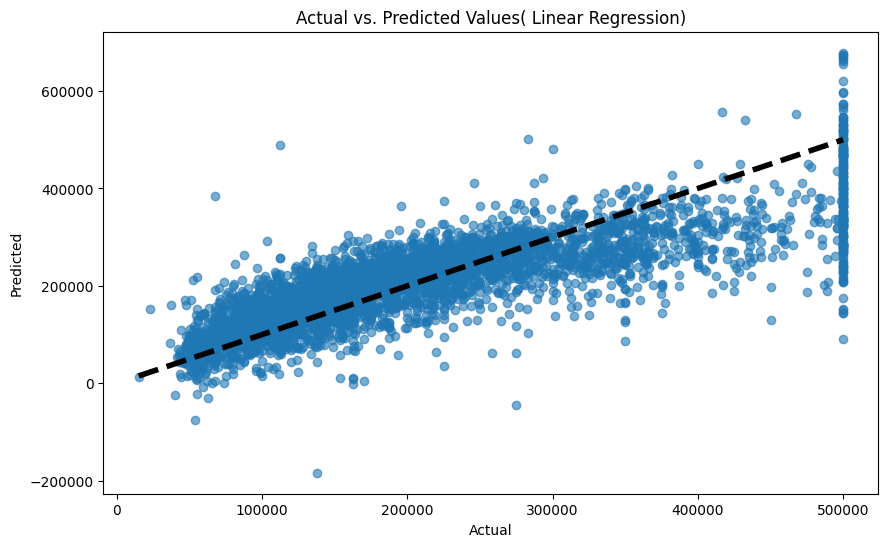

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, lin_predictions, alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=4)  # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values( Linear Regression)')
plt.show()


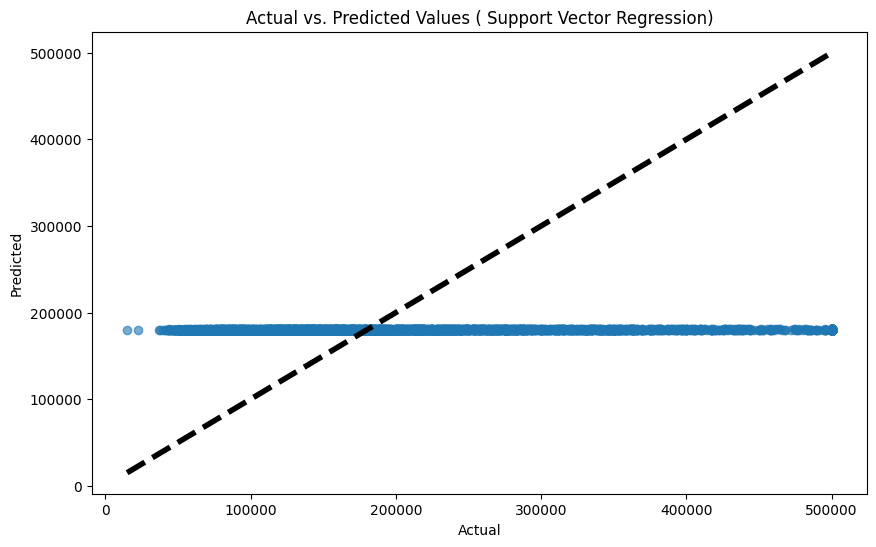

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, svr_predictions, alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=4)  # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values ( Support Vector Regression)')
plt.show()


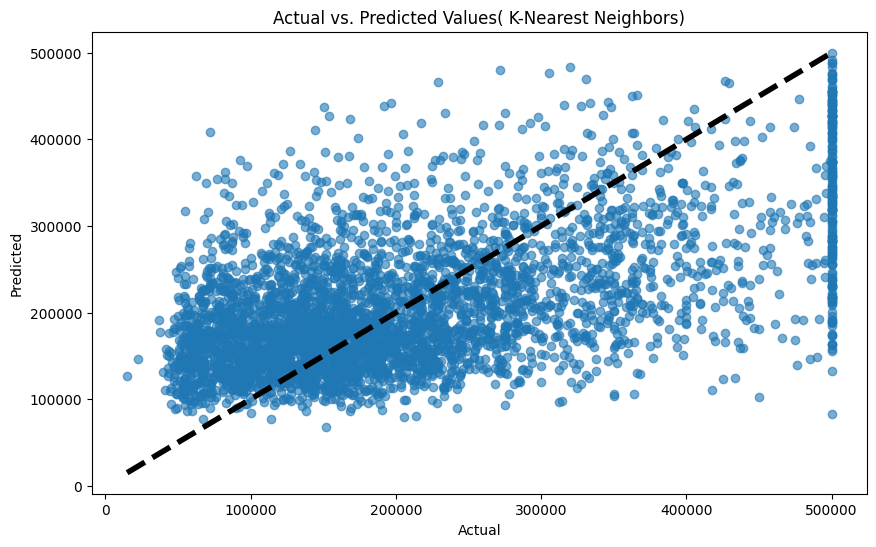

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, knn_predictions, alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=4)  # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values( K-Nearest Neighbors)')
plt.show()
